# Lab 6 - Macierz pomyłek w klasyfikacji binarnej, miary oceny wydajności modelu

## Wprowadzenie ogólne do oceny modeli klasyfikacyjnych

Klasyfikacja jest jednym z podstawowych zadań w uczeniu maszynowym, polegającym na przypisywaniu obiektów do określonych kategorii lub klas. Ocena modeli klasyfikacyjnych wywodzi się z potrzeb statystyki i nauk społecznych, gdzie kluczowym zadaniem było ustalenie, jak dobrze model radzi sobie z przewidywaniem poprawnych wyników. Przez dziesięciolecia powstały różne metryki, które pozwalają na precyzyjną analizę, jak dobrze model działa w praktyce, uwzględniając specyfikę problemu.

W kontekście klasyfikacji binarnej, kiedy mamy tylko dwie klasy (np. „pozytywna” i „negatywna”), ocena wydajności modelu jest szczególnie istotna. Często stosowane miary, takie jak dokładność, precyzja czy czułość, pozwalają na szczegółowe zrozumienie, jak model zachowuje się w różnych sytuacjach – zarówno przy przewidywaniu poprawnych, jak i błędnych wyników.

### Dlaczego warto stosować różne miary oceny?

Różne problemy klasyfikacyjne mają swoje unikalne cechy i wymagania. Na przykład, w medycynie bardziej istotne może być zminimalizowanie przypadków fałszywie negatywnych (pacjent z chorobą, ale klasyfikowany jako zdrowy), natomiast w filtrowaniu spamu często ważniejsze jest unikanie fałszywych pozytywów (prawdziwa wiadomość oznaczona jako spam). Dlatego jednorodna miara oceny, taka jak dokładność, nie zawsze jest wystarczająca. Dopiero zrozumienie i analiza macierzy pomyłek oraz dokładne wykorzystanie kilku miar oceny wydajności pozwalają na kompleksową ocenę modelu.

## Macierz pomyłek (Confusion Matrix)

Macierz pomyłek to narzędzie stosowane w statystyce i analizie danych od lat 60-tych XX wieku, kiedy zaczęto rozwijać modele klasyfikacyjne. Jest podstawowym narzędziem do oceny modeli klasyfikacyjnych, które pozwala na dokładną analizę tego, jak model radzi sobie z poszczególnymi klasami. Dzięki niej można zobaczyć, które przypadki zostały zaklasyfikowane poprawnie, a które błędnie, oraz w jaki sposób model popełnia błędy.

Macierz pomyłek w przypadku klasyfikacji binarnej to tabela o wymiarach 2x2, która przedstawia liczbę przypadków przewidywanych poprawnie i błędnie:

|                | Przewidywane Pozytywne | Przewidywane Negatywne |
|----------------|------------------------|-------------------------|
| **Prawdziwe Pozytywne** | TP                     | FN                      |
| **Prawdziwe Negatywne** | FP                     | TN                      |

Macierz pomyłek może też przybrać inną, bardziej skomplikowaną formę, jeżeli nie używamy klasyfikacji binarnej, a wieloklasowej, czyli takiej, która posiada więcej niż 2 klasy:

![komplikowana macierz pomyłek](owoce_3_1_fold.jpg "Skomplikowana macierz pomyłek")

... albo jeszcze bardziej skomplikowana:

![bardzo skomplikowana macierz pomyłek](heatmap_ex.jpg "Bardzo skomplikowana macierz pomyłek")

Macierz pomyłek jest niezwykle pomocna, ponieważ pozwala analizować różne rodzaje błędów modelu:
* *True Positives (TP)* - przypadki, gdy model poprawnie przewidział klasę pozytywną.
* *True Negatives (TN)* - przypadki, gdy model poprawnie przewidział klasę negatywną.
* *False Positives (FP)* - przypadki, gdy model błędnie zaklasyfikował jako pozytywne przypadki negatywne. Przykładem może być zdrowa osoba błędnie zdiagnozowana z chorobą.
* *False Negatives (FN)* - przypadki, gdy model błędnie zaklasyfikował przypadki pozytywne jako negatywne. Przykład: chora osoba zdiagnozowana jako zdrowa.

Macierz pomyłek jest podstawą do obliczania innych miar wydajności modelu, takich jak dokładność, precyzja, czułość i specyficzność.

Wczytajmy przykładowe dane, które zawierają klasyfikację binarną, czy pacjent ma raka piersi, czy nie:

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = pd.DataFrame(data.data, columns= data.feature_names), pd.DataFrame(data.target, columns= ["decision"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [2]:
y

,decision
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [3]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
149,13.740,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.340,22.46,97.19,725.9,0.09711,0.18240,0.15640,0.06019,0.2350,0.07014
124,13.370,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,...,14.260,22.75,91.99,632.1,0.10250,0.25310,0.33080,0.08978,0.2048,0.07628
421,14.690,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.460,18.34,114.10,809.2,0.13120,0.36350,0.32190,0.11080,0.2827,0.09208
195,12.910,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.880,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949
545,13.620,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,15.350,29.09,97.58,729.8,0.12160,0.15170,0.10490,0.07174,0.2642,0.06953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


Aby poprawnie sprawdzać, czy nasz model działa w stopniu przynajmniej akceptowalnym powinniśmy najpierw nauczyć się oceniać poprawność działania naszego modelu. W celu sprawdzenia jak działają poszczególne funkcje z biblioteki scikit - learn posłużymy się klasyfikatorem Regresji Liniowej (Linear Regression)

In [4]:
from sklearn.naive_bayes import GaussianNB

# Wykorzystanie klasyfikatora Random Forest
model = GaussianNB()
model.fit(X_train, y_train.values.ravel())

# Predykcje na zbiorze testowym
y_pred = model.predict(X_test)

Funkcja `confusion_matrix` z biblioteki `scikit - learn` tworzy macierz pomyłek, która wskazuje liczbę przypadków poprawnych i błędnych klasyfikacji. 

Parametry:
* *y_true*: Prawdziwe etykiety klas.
* *y_pred*: Przewidywane etykiety klas.
* *labels*: Lista etykiet klas do uwzględnienia.
* *sample_weight*: Wagi próbek.
* *normalize*: Opcjonalne znormalizowanie macierzy. Opcje:
    * *True*: Znormalizowana macierz.
    * *None*: Macierz bez normalizacji.

In [5]:
from sklearn.metrics import confusion_matrix

# Wyświetlanie macierzy pomyłek
cm = confusion_matrix(y_test, y_pred, labels = np.unique(y))
pd.DataFrame(cm)

,0,1
0,57,6
1,4,104


## Miary oceny wydajności modelu klasyfikacyjnego

### Dokładność (Accuracy)

Dokładność była jedną z pierwszych miar stosowanych do oceny klasyfikatorów. Mierzy ona ogólną skuteczność modelu, jednak może być myląca w przypadku niezbalansowanych zbiorów danych.

$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$

Dokładność mówi, jaki procent wszystkich przypadków model zaklasyfikował poprawnie. Jest używana, gdy klasy są zbalansowane, to znaczy, gdy liczba przypadków pozytywnych i negatywnych jest zbliżona. Dokładność bywa jednak myląca w przypadku niezbalansowanych danych, ponieważ model może mieć wysoką dokładność, mimo że radzi sobie słabo z klasą mniejszościową.

In [6]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9415204678362573

### Dokładność zbalansowana

W sytuacji gdy liczba obiektów w obrębie poszczególnych klas decyzyjnych nie jest do siebie zbliżona, warto zastosować miarę dokładności zbalansowanej która odpowiada średniej dokładności dla każdej z klas decyzyjnych w zbiorze danych.

In [7]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.9338624338624338

### Precyzja (Precision)

Precyzja jest szczególnie ważna w dziedzinach takich jak bezpieczeństwo informacji i diagnostyka medyczna, gdzie błędna klasyfikacja pozytywna może być kosztowna.

$
\text{Precision} = \frac{TP}{TP + FP}
$

Precyzja wskazuje, jaki procent przypadków przewidywanych jako pozytywne jest rzeczywiście pozytywny. Jest istotna, gdy koszty błędnych klasyfikacji pozytywnych są wysokie. Na przykład, w filtrowaniu spamu wysoka precyzja minimalizuje liczbę prawdziwych wiadomości oznaczonych jako spam.

In [8]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
precision

0.9454545454545454

### Czułość (Recall) / Sensitivity / TPR (True Positive Rate)

Czułość to miara zorientowana na maksymalizację liczby wykrytych przypadków pozytywnych. Jest szczególnie ważna w medycynie, gdzie niediagnozowanie choroby jest bardzo ryzykowne.

$
\text{Recall} = \frac{TP}{TP + FN}
$

Czułość mierzy skuteczność wykrywania przypadków pozytywnych. Jest istotna, gdy pominięcie przypadku pozytywnego (fałszywie negatywnego) wiąże się z dużymi konsekwencjami, np. w wykrywaniu oszustw lub chorób.

In [9]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
recall

0.9629629629629629

### Specyficzność (Specificity)

Specyficzność jest często używana w parze z czułością, szczególnie w diagnostyce medycznej, aby zobaczyć, jak dobrze model unika błędnych klasyfikacji pozytywnych.

$
\text{Specificity} = \frac{TN}{TN + FP}
$

Specyficzność określa zdolność modelu do wykrywania przypadków negatywnych. Jest ważna, gdy istotne jest unikanie fałszywie pozytywnych wyników. Na przykład, przy wykrywaniu wirusów komputerowych zależy nam na wysokiej specyficzności, aby uniknąć klasyfikowania nieszkodliwych plików jako złośliwych.

In [10]:
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp)
specificity

0.9047619047619048

### F1-Score

F1-score powstał z potrzeby uzyskania jednej miary, która równoważy precyzję i czułość. Stosowany jest w sytuacjach, gdy dane są niezbalansowane.

$
\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$

F1-score jest średnią harmoniczną precyzji i czułości. Jest użyteczny, gdy klasy są niezbalansowane i gdy równie ważne jest minimalizowanie fałszywych pozytywów i fałszywych negatywów. Stosuje się go np. przy analizie danych medycznych, gdzie wykrycie choroby oraz unikanie błędnych diagnoz są równie ważne.

In [11]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
f1

0.9541284403669724

### ROC AUC (Receiver Operating Characteristic - Area Under Curve)

Krzywa ROC została wprowadzona podczas II wojny światowej do oceny wydajności radarów, a następnie adoptowana do analizy modelów statystycznych i uczenia maszynowego.

ROC to wykres, który pokazuje stosunek TPR do FPR (False Positive Rate) przy różnych progach decyzyjnych. Obszar pod krzywą (AUC) pokazuje zdolność modelu do odróżniania klas. 

ROC AUC jest miarą stosowaną, gdy zależy nam na analizie wydajności modelu przy różnych progach decyzyjnych. Przykład zastosowania to diagnostyka medyczna, gdzie lekarz może dostosowywać próg klasyfikacyjny w zależności od ryzyka fałszywych diagnoz.

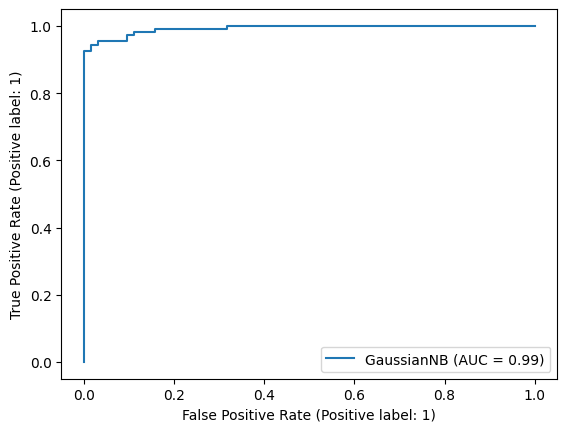

In [12]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

## Overfitting i underfitting

Aby ocenić, czy model uczenia maszynowego jest narażony na overfitting (przeuczenie) lub underfitting (niedouczenie), stosuje się analizę wyników modelu na zbiorach treningowym i testowym. Overfitting występuje, gdy model bardzo dobrze dopasowuje się do danych treningowych, ale jego wydajność na danych testowych jest znacznie gorsza, co oznacza, że model nie generalizuje dobrze na nowe dane. Underfitting ma miejsce, gdy model nie radzi sobie dobrze zarówno na zbiorze treningowym, jak i testowym, co sugeruje, że model jest zbyt prosty, aby dobrze reprezentować zależności w danych.

### Krok po kroku: Wykrywanie overfittingu i underfittingu

#### 1. Ocena błędu modelu na zbiorze treningowym i testowym

Typowe podejście do wykrywania overfittingu i underfittingu polega na porównaniu miar wydajności na zbiorze treningowym i testowym. Wysoka dokładność na zbiorze treningowym i niska dokładność na zbiorze testowym sugeruje overfitting, podczas gdy niska dokładność na obu zbiorach oznacza underfitting.

Accuracy = 100% prawie zawsze oznacza overfitting, chyba że masz ekstremalnie prosty problem lub bardzo duży, łatwy zbiór danych.
Ale da się to zbadać i potwierdzić, zamiast tylko zgadywać.

W większości realistycznych problemów uczenia maszynowego uzyskanie 100% trafności na danych testowych oznacza, że:
- model nauczył się na pamięć wzorców (overfitting),
- dane testowe są zbyt łatwe lub mają błędy,
- dane treningowe i testowe nakładają się lub mają duplikaty,
- model jest zbyt skomplikowany jak na wielkość zbioru danych (np. RandomForest 1000 drzew na 200 rekordach).

Dlatego 100% accuracy zwykle powinno zapalać czerwoną lampkę, chyba, że problem jest ekstremalnie prosty i nawet prosty algorytm matematyczny dałby sobie rade.

#### 2. Wykresy krzywych uczenia (Learning Curves)

Krzywe uczenia przedstawiają, jak błąd modelu zmienia się w miarę zwiększania liczby próbek treningowych. Pomagają one lepiej zrozumieć, jak model radzi sobie z różnymi rozmiarami danych i czy jest podatny na overfitting lub underfitting.

### Implementacja w Pythonie: Wykres krzywych uczenia

Poniżej znajduje się przykład, jak użyć scikit-learn do wizualizacji krzywych uczenia dla modelu. Skorzystamy z funkcji `learning_curve`, która pokazuje, jak dokładność modelu zmienia się wraz z rozmiarem danych treningowych.

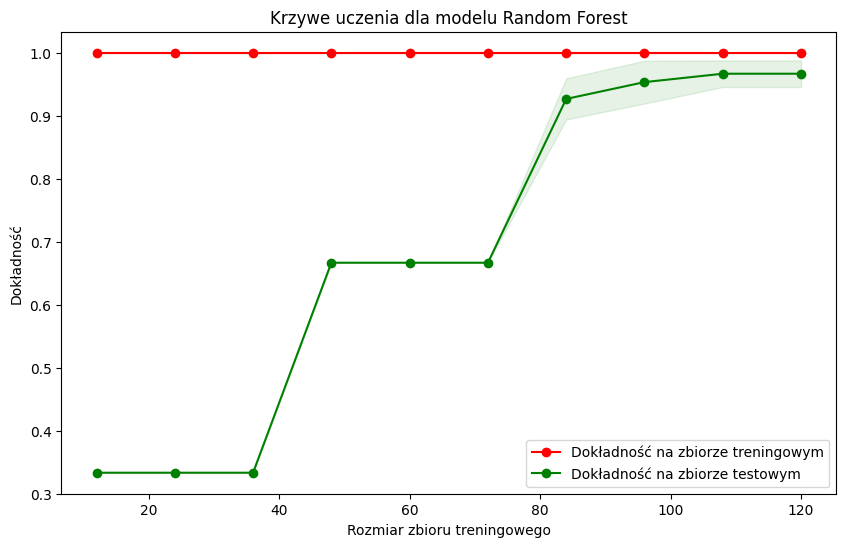

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Ładowanie zbioru danych
data = load_iris()
X, y = data.data, data.target

# Wybór modelu
model = RandomForestClassifier(random_state=42)

# Ustalanie krzywych uczenia
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')

# Obliczenie średnich i odchyleń standardowych
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Wizualizacja wyników
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Dokładność na zbiorze treningowym")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Dokładność na zbiorze testowym")

# Cieniowanie obszarów odchylenia standardowego
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.1)

plt.xlabel("Rozmiar zbioru treningowego")
plt.ylabel("Dokładność")
plt.legend(loc="best")
plt.title("Krzywe uczenia dla modelu Random Forest")
plt.show()


### Analiza krzywych uczenia

#### Overfitting
- Krzywa dla zbioru treningowego osiąga wysoką dokładność, ale na zbiorze testowym pozostaje niska.
- Sugeruje to, że model dobrze dopasował się do danych treningowych, ale nie radzi sobie z danymi, których nie widział wcześniej.

#### Underfitting
- Obie krzywe (dla zbioru treningowego i testowego) pozostają stosunkowo nisko i nie zwiększają się znacząco wraz ze wzrostem liczby danych.
- Wskazuje to, że model nie jest wystarczająco skomplikowany, aby uchwycić wzorce w danych, i prawdopodobnie wymaga zwiększenia złożoności.

#### Właściwe dopasowanie
- Krzywe dla zbioru treningowego i testowego są blisko siebie i obie osiągają wysoką wartość przy dużych rozmiarach próbek.
- Wskazuje to, że model generalizuje dobrze i jest odpowiednio dopasowany.

### Inne techniki wykrywania overfittingu i underfittingu

1. **Walidacja krzyżowa**: Podział danych na wiele podzbiorów (foldów) i trenowanie modelu na różnych częściach danych może pomóc w lepszej ocenie jego wydajności. Stabilność wyników na różnych foldach jest oznaką dobrego dopasowania modelu.
  
2. **Regularizacja**: Dodanie regularizacji (np. L1 lub L2 w regresji) może pomóc w uniknięciu overfittingu przez penalizację złożoności modelu.

3. **Early Stopping** (w sieciach neuronowych): Zatrzymywanie treningu, gdy błąd walidacyjny przestaje maleć, może ograniczyć przeuczenie modelu.

Można oszacować overfitting i underfitting używając tylko wskaźnika **accuracy** (dokładności). Chociaż stosowanie samych wartości accuracy jest mniej precyzyjne niż pełna analiza krzywych uczenia czy innych miar, to porównanie dokładności na zbiorach treningowym i testowym może dać podstawową ocenę, czy model jest przeuczony (overfit) lub niedouczony (underfit). 

### Krok po kroku: Ocena modelu z użyciem accuracy

1. **Wytrenuj model na zbiorze treningowym.**
2. **Oblicz accuracy** na zbiorze treningowym oraz na zbiorze testowym.
3. **Porównaj wartości** accuracy dla obu zbiorów:

   - **Overfitting**: Jeśli accuracy na zbiorze treningowym jest znacznie wyższe niż na zbiorze testowym, model może być przeuczony. Oznacza to, że model dobrze zapamiętał dane treningowe, ale nie potrafi generalizować na nowych danych.
   - **Underfitting**: Jeśli accuracy jest niskie zarówno na zbiorze treningowym, jak i testowym, model może być niedouczony. W takim przypadku model nie jest wystarczająco złożony, aby uchwycić wzorce w danych.
   - **Dobrze dopasowany model**: Jeśli accuracy na zbiorze treningowym i testowym są zbliżone i wysokie, model prawdopodobnie jest dobrze dopasowany i generalizuje poprawnie.

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Ładowanie zbioru danych
data = load_iris()
X, y = data.data, data.target

# Podział danych na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Trening modelu
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Obliczanie accuracy na zbiorze treningowym i testowym
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print("Dokładność na zbiorze treningowym:", train_accuracy)
print("Dokładność na zbiorze testowym:", test_accuracy)

# Interpretacja wyników
if train_accuracy > test_accuracy:
    if train_accuracy - test_accuracy > 0.1:  # Dostosowujemy ten próg w zależności od problemu
        print("Model wykazuje oznaki overfittingu (przeuczenia).")
    else:
        print("Model jest dobrze dopasowany.")
elif train_accuracy < 0.7 and test_accuracy < 0.7:  # Dostosowujemy ten próg w zależności od problemu
    print("Model wykazuje oznaki underfittingu (niedouczenia).")
else:
    print("Model jest dobrze dopasowany.")


Dokładność na zbiorze treningowym: 1.0
Dokładność na zbiorze testowym: 1.0
Model jest dobrze dopasowany.


Chociaż, należałoby się zastanowić przy 100% accuracy czy problem jest na tyle banalnie prosty czy może jednak mamy overfitting.

### Wyjaśnienie progów

- **Próg różnicy 0.1 dla overfittingu**: Możemy przyjąć, że model jest przeuczony, jeśli różnica między dokładnością na zbiorze treningowym a testowym wynosi około 0.1 lub więcej. Ten próg jest przykładowy i zależy od specyfiki problemu oraz rozmiaru zbioru danych.
- **Próg 0.7 dla underfittingu**: Jeśli dokładność na obu zbiorach jest poniżej 70%, możemy przypuszczać, że model nie dopasowuje się dobrze do danych. Ten próg również jest orientacyjny i może być dostosowany do konkretnego przypadku.

## Podejścia do klasyfikacji wieloklasowej
W przypadku problemów wieloklasowych klasy mogą mieć charakter wzajemnie wykluczający się (np. klasy 1, 2, 3 – każda obserwacja należy do jednej klasy) lub mogą mieć bardziej skomplikowaną strukturę, jak w przypadku klasyfikacji wieloetykietowej, gdzie każda próbka może mieć przypisane więcej niż jedną klasę.

### Metody obliczania miar dla klasyfikacji wieloklasowej

Aby obliczyć miary oceny dla klasyfikacji wieloklasowej, stosuje się dwa główne podejścia:

#### Podejście One-vs-Rest (OvR)
W podejściu One-vs-Rest, każda klasa jest analizowana oddzielnie: wybiera się jedną klasę jako „pozytywną”, a pozostałe klasy jako „negatywne”. Dla każdej klasy oblicza się miary jak dla klasyfikacji binarnej, a następnie uśrednia się je w całym zbiorze danych. Można to zrobić na dwa sposoby:
  
  - **Średnia makro (macro-averaging)**: Uśrednia wyniki dla każdej klasy po równi, niezależnie od liczby próbek w każdej klasie. 
  - **Średnia ważona (weighted-averaging)**: Uśrednia wyniki dla każdej klasy, ale z uwzględnieniem liczby próbek w poszczególnych klasach (ważona liczebnością klas).

#### Podejście One-vs-One (OvO)
W podejściu One-vs-One tworzymy klasyfikator dla każdej pary klas. Oznacza to, że dla problemu z \( n \) klasami potrzebujemy $( \frac{n(n-1)}{2} )$ klasyfikatorów. Wyniki są obliczane dla każdej pary, a końcowy wynik to średnia dla wszystkich par.

W praktyce podejście One-vs-Rest jest częściej stosowane ze względu na niższą złożoność obliczeniową.

### Obliczanie miar oceny dla klasyfikacji wieloklasowej

Przy klasyfikacji wieloklasowej możemy obliczyć te same miary, co dla klasyfikacji binarnej, jednak każda z nich jest uogólniona do podejścia wieloklasowego.

#### Dokładność (Accuracy)
Dokładność w klasyfikacji wieloklasowej oblicza się jako odsetek poprawnych przewidywań w stosunku do wszystkich próbek. Dla wielu klas dokładność nadal jest jedną liczbą, która opisuje skuteczność modelu w całym zbiorze danych.

#### Precyzja, Czułość i F1-Score
W klasyfikacji wieloklasowej precyzję, czułość oraz F1-score oblicza się dla każdej klasy z osobna, traktując tę klasę jako pozytywną, a resztę jako negatywne (zgodnie z podejściem One-vs-Rest). Następnie wyniki są uśredniane.

In [15]:
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Ładowanie zbioru danych Iris (wieloklasowy zbiór danych z 3 klasami)
data = load_iris()
X, y = data.data, data.target

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

# Trening modelu Random Forest
model = RandomForestClassifier(random_state=13)
model.fit(X_train, y_train)

# Predykcje
y_pred = model.predict(X_test)

# Wyświetlenie raportu z miarami oceny dla klasyfikacji wieloklasowej
print(classification_report(y_test, y_pred, target_names=data.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.86      1.00      0.92        12
   virginica       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



`classification_report` wygeneruje precyzję, czułość, F1-score oraz dokładność dla każdej z klas oraz ogólną średnią według różnych metod (macro, weighted).

#### ROC AUC dla klasyfikacji wieloklasowej
ROC AUC dla wieloklasowej klasyfikacji wymaga nieco innego podejścia. Możemy:
  
- Obliczyć AUC dla każdej klasy traktując ją jako pozytywną i uśredniać wynik.
- Wykorzystać podejście One-vs-One, tworząc krzywe ROC dla każdej pary klas.

Przykład zastosowania metody ROC AUC dla klasyfikacji wieloklasowej wymaga predykcji prawdopodobieństw dla każdej klasy. W scikit-learn można użyć `roc_auc_score` z argumentem `average='macro'` lub `average='weighted'`.

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the output for multi-class AUC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = model.predict_proba(X_test)

# Obliczenie ROC AUC
roc_auc = roc_auc_score(y_test_binarized, y_pred_prob, average='macro', multi_class='ovr')
print("ROC AUC (macro-averaging):", roc_auc)


ROC AUC (macro-averaging): 1.0


# Zadania

1. Użyj zbioru danych o cukrzycy używając funkcji `load_diabetes()` z biblioteki `sklearn.datasets`. Załaduj dane i przeprowadź klasyfikację binarną, traktując pacjentów z wynikiem powyżej mediany jako pozytywnych (1) oraz tych z wynikiem poniżej lub równym medianie jako negatywnych (0). Użyj modelu `LogisticRegression` z biblioteki `sklearn.linear_model`. Tam gdzie to potrzebne zastosuj z atrybut `random_state` ustawionym na 42. Po wytrenowaniu modelu oblicz macierz pomyłek i ją wyświetl. Zinterpretuj wyniki.

2. Kontynuując z ćwiczenia 1, oblicz dokładność (accuracy), precyzję (precision), czułość (recall) oraz wynik F1 (F1-score) dla swojego modelu. Zinterpretuj, co te miary mówią o wydajności modelu.

3. Użyj zbioru danych o winie `load_wine()` z biblioteki `sklearn.datasets`. Załaduj dane i przeprowadź klasyfikację wieloklasową, traktując jako cechę klasyfikacji jakość wina. Użyj modelu `RandomForestClassifier`. Tam gdzie to potrzebne zastosuj z atrybut `random_state` ustawionym na 3. Po wytrenowaniu modelu oblicz macierz pomyłek i ją wyświetl. Zinterpretuj wyniki.

4. Używając zbioru danych o cukrzycy oblicz dokładność na zbiorze treningowym oraz na zbiorze testowym. Zinterpretuj wyniki, aby ocenić, czy model wykazuje oznaki overfittingu lub underfittingu.

5. Użyj `learning_curve` z `scikit-learn`, aby stworzyć krzywe uczenia dla modelu `RandomForestClassifier` na zbiorze danych o winie. Zinterpretuj krzywe uczenia, aby ocenić, czy model jest narażony na overfitting lub underfitting.